<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝

- ANN

- 경사하강법

- 오차역전파

- Optimizer

- CNN

- ResNet

- RNN, LSTM, GRU

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# 모델 생성

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras.utils import plot_model

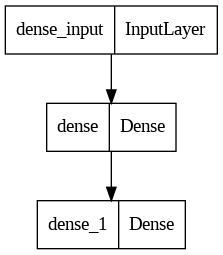

In [ ]:
plot_model(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3232      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#모델 컴파일

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

- 경사하강법

- 확률적 경사하강법(SGD) : 무작위로 선택된 데이터로 경사하강법 사용

- 모멘텀 : 국소 최소점을 벗어 날 수 있도록 SGD에 가중치의 1차식을 더해 준 방식

- Adagrad : 고정된 학습률이 아닌 변화하는 학습률을 사용하게 해주는 옵티마이저

- rmsprop : Adarad 에서 학습률이 줄어드는 문제를 해결하기 위한 옵티마이저

- Adam : 모멘텀 + rmsprop

비용함수 (손실값 계산)

- 회귀 : mean_squared_error, 항등함수

- 분류(다중) : categorical_crossentropy, 소프트맥스

- 분류(다중) : sparse_categorical_crossentropy, 소프트맥스

- 이진 분류 : binary_crossentropy, 시그모이드

$$
L(y, p) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log(p_{i,k})
$$

$$
L(y, p) = -\frac{1}{N} \sum_{i=1}^{N} \left[y_i \log(p_i) + (1 - y_i) \log(1 - p_i)\right]
$$

N=1, y가 정답, p가 예측값

y=1, p=1 ---> -log(1) = 0

y=1, p=0 ---> -log(0) = inf

<ipython-input-7-2fb2edf68be5>:4: RuntimeWarning: invalid value encountered in log
  plt.plot(x, -np.log(x))


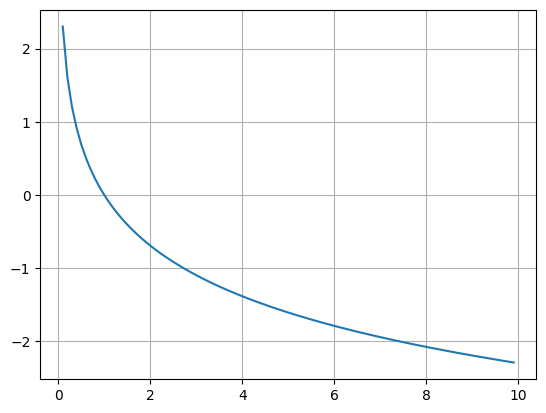

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.1)
plt.plot(x, -np.log(x))
plt.grid()

# 모델 훈련

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=100)

전체 데이터 개수 : 60000  

batch_size : 100

1epoch 에 필요한 반복횟수 : 600

epochs = 10

전체 반복횟수 :  600*10 = 6000

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=100,
          validation_data=(x_val, y_val))

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=100,
          validation_split=0.2)

검증데이터의 손실함수가 계속 감소 -> 증가 : 과적합이 일어나는 신호

#모델 평가, 예측

In [ ]:
model.evaluate(x_test, y_test, batch_size=100)

In [ ]:
model.predict(x_new_input, batch_size=100 )

#모델 저장, 불러오기

In [ ]:
model.save('model_name.h5') #hdf5 파일 형식

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('model_name.h5')

사용하기

In [ ]:
data = np.random.random((1000,100))

In [ ]:
labels = np.random.randint(2, size=(1000,1))

In [ ]:
data.shape

(1000, 100)

In [ ]:
data[0]

In [ ]:
labels.shape

(1000, 1)

In [ ]:
labels[0:30]

모델생성

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(32, activation='relu', input_dim=100))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

모델 컴파일

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

모델 훈련

In [ ]:
model.fit(data, labels, epochs=10, batch_size=128)

Epoch 1/10
8/8 [==============================] - 1s 4ms/step - loss: 0.7248 - accuracy: 0.4920
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7107 - accuracy: 0.4850
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.4980
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.5210
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5110
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.5370
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5150
Epoch 8/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5360
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5520
Epoch 10/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.5400


모델 평가, 예측

In [ ]:
x_test = data[:10]

In [ ]:
x_test.shape

(10, 100)

In [ ]:
y_test=labels[:10]

In [ ]:
y_test.shape

(10, 1)

In [ ]:
y_test

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [ ]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 257ms/step - loss: 0.6546 - accuracy: 0.6000


[0.6545928716659546, 0.6000000238418579]

In [ ]:
x_test.ndim

2

In [ ]:
x_hat = x_test[0]

In [ ]:
x_hat.shape

(100,)

In [ ]:
x_hat = x_test[0:1]

In [ ]:
x_hat.shape

(1, 100)

In [ ]:
model.predict(x_hat)

1/1 [==============================] - 0s 54ms/step


array([[0.5018331]], dtype=float32)

모델 저장, 로드

In [ ]:
model.save('mm_ex.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2 = load_model('mm_ex.h5')

In [ ]:
model2.evaluate(x_test, y_test)

1/1 [==============================] - 0s 232ms/step - loss: 0.6546 - accuracy: 0.6000


[0.6545928716659546, 0.6000000238418579]

예제

In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [ ]:
from tensorflow import keras

In [ ]:
(train_input, train_target), (test_input, test_target) =
keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## 패션 MNIST

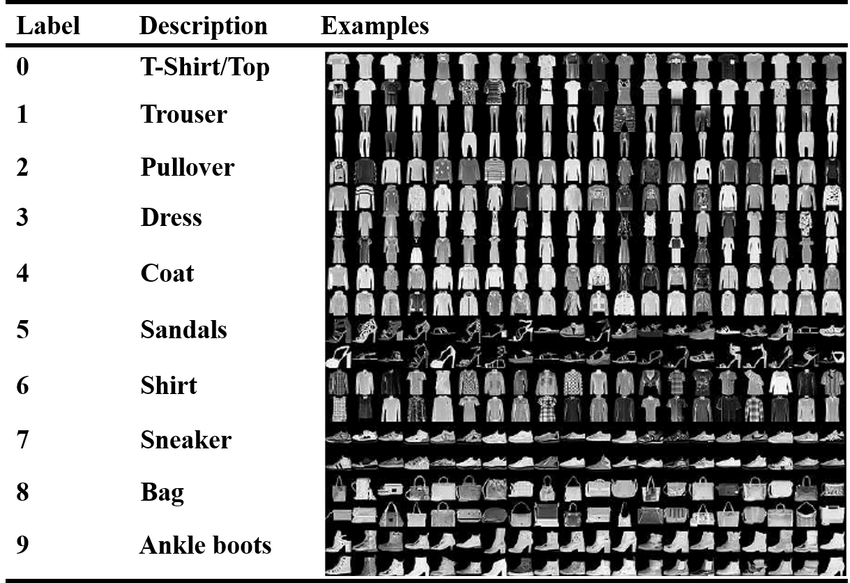

In [ ]:
train_input.shape, train_target.shape

((60000, 28, 28), (60000,))

In [ ]:
test_input.shape, test_target.shape

((10000, 28, 28), (10000,))

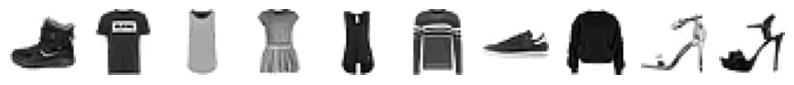

In [ ]:
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
[train_target[i] for i in range(10)]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

In [ ]:
np.unique(train_target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
train_input[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
train_scaled.shape

(60000, 784)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
train_sc.shape

(48000, 784)

In [ ]:
train_tg.shape

(48000,)

In [ ]:
val_sc.shape, val_tg.shape

((12000, 784), (12000,))

In [ ]:
train_tg[:10]

array([7, 3, 5, 8, 6, 9, 3, 3, 9, 9], dtype=uint8)

In [ ]:
model = Sequential()
model.add(Dense(10, activation='softmax', input_shape=(784,)))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(train_sc, train_tg, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6069 - accuracy: 0.7947
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4742 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4508 - accuracy: 0.8474
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4367 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4280 - accuracy: 0.8555


In [ ]:
model.evaluate(val_sc, val_tg)

375/375 [==============================] - 1s 3ms/step - loss: 0.4526 - accuracy: 0.8465


[0.45262545347213745, 0.8464999794960022]

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.optimizer

In [ ]:
model.get_config()

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_tg[:10]

array([7, 3, 5, 8, 6, 9, 3, 3, 9, 9], dtype=uint8)

In [ ]:
val_tg[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=uint8)

In [ ]:
val_cat = to_categorical(val_tg)
train_cat = to_categorical(train_tg)

In [ ]:
val_cat[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
dense = Dense(10, activation='softmax', input_shape=(784,))
model = Sequential(dense)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics='accuracy')
model.fit(train_sc, train_cat, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6082 - accuracy: 0.7925
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4744 - accuracy: 0.8382
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4507 - accuracy: 0.8473
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4367 - accuracy: 0.8534
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4278 - accuracy: 0.8559


In [ ]:
model.evaluate(val_sc, val_cat)

375/375 [==============================] - 2s 3ms/step - loss: 0.4520 - accuracy: 0.8457


[0.4520343542098999, 0.8457499742507935]

연습

1. 데이터불러오기 : fashion_mnist

2. train_scaled, val_scaled, train_target, val_target

3. model 생성

    2층 신경망

    신경망의 노드수 : [100, 10]

4. 컴파일, 학습

5. 평가

In [ ]:
(train_input, train_target), (test_input, test_target) =
keras.datasets.fashion_mnist.load_data()

In [ ]:
train_scaled = train_input/255.0
train_scaled = train_scaled.reshape(-1, 784)

In [ ]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state=42
)

In [ ]:
model = Sequential([
    Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_Model')

In [ ]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3344 - accuracy: 0.8782


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 5ms/step - loss: 0.3607 - accuracy: 0.8669


[0.36067989468574524, 0.8669166564941406]

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, batch_size=128,
          validation_data=(val_scaled, val_target))

model.evaluate(test_input/255.0, test_target)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6098 - accuracy: 0.7883 - val_loss: 0.5180 - val_accuracy: 0.8217
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.4378 - accuracy: 0.8431 - val_loss: 0.4678 - val_accuracy: 0.8293
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3926 - accuracy: 0.8594 - val_loss: 0.3754 - val_accuracy: 0.8679
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3608 - accuracy: 0.8699 - val_loss: 0.3767 - val_accuracy: 0.8652
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3373 - accuracy: 0.8758 - val_loss: 0.3824 - val_accuracy: 0.8604
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3215 - accuracy: 0.8841 - val_loss: 0.3375 - val_accuracy: 0.8813
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3075 - accuracy: 0.8874 - val_loss: 0.3457 - val_accuracy: 0.8740
Epoch 

[0.3468674421310425, 0.8823000192642212]

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# callback 의 history

    - 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

    - keras.callbacks 패키지 아래에 있는 클래스


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
for i in history.history:
    print('=='*10, i, '=='*10)
    print(history.history[i])
    print(np.mean(history.history[i]))

==================== loss ====================
[0.6098366975784302, 0.43784263730049133, 0.39262068271636963, 0.3608267903327942, 0.33728858828544617, 0.3214617669582367, 0.3075312376022339, 0.29502493143081665, 0.2838784158229828, 0.27528709173202515, 0.26851966977119446, 0.26075273752212524, 0.2529190480709076, 0.24534150958061218, 0.2390315681695938, 0.23447217047214508, 0.22881506383419037, 0.2222253382205963, 0.218728169798851, 0.21483154594898224]
0.30036178305745126
==================== accuracy ====================
[0.7883333563804626, 0.8431041836738586, 0.859416663646698, 0.8698750138282776, 0.8758333325386047, 0.8840625286102295, 0.8873541951179504, 0.8916875123977661, 0.8944583535194397, 0.9000208377838135, 0.9000625014305115, 0.9042291641235352, 0.9066458344459534, 0.9108750224113464, 0.9116250276565552, 0.9146249890327454, 0.9160416722297668, 0.9186458587646484, 0.9195208549499512, 0.9207291603088379]
0.8908573031425476
==================== val_loss ====================
[

In [ ]:
len(history.history[i])

20

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

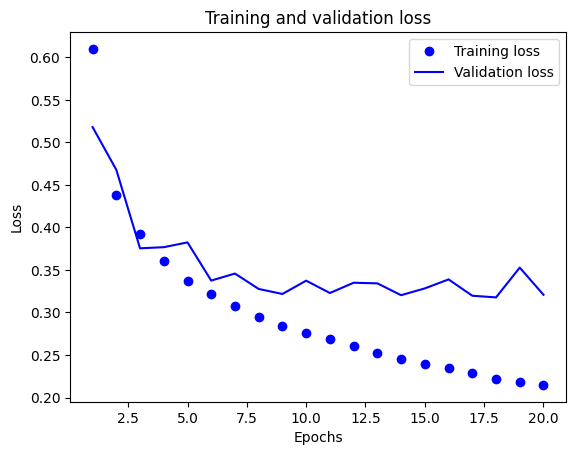

In [ ]:
epochs = range(1,  len(acc)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

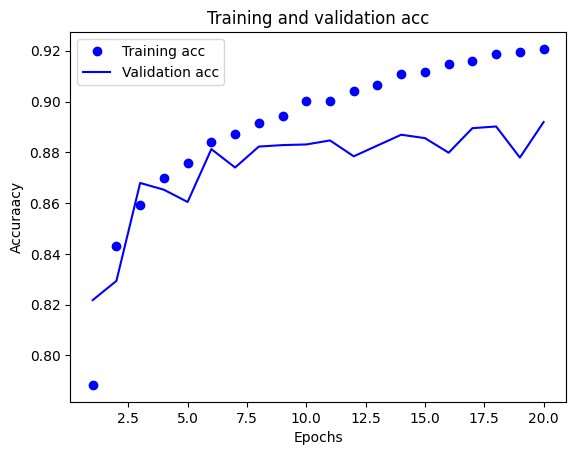

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuraacy')
plt.legend()

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=3, batch_size=128,
          validation_data=(val_scaled, val_target))

model.evaluate(test_input/255.0, test_target)

Epoch 1/3
375/375 [==============================] - 3s 6ms/step - loss: 0.6130 - accuracy: 0.7862 - val_loss: 0.4975 - val_accuracy: 0.8257
Epoch 2/3
375/375 [==============================] - 2s 5ms/step - loss: 0.4356 - accuracy: 0.8445 - val_loss: 0.4830 - val_accuracy: 0.8232
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.3999 - accuracy: 0.8579


[0.3999026417732239, 0.8579000234603882]

#옵티마이저

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=3, batch_size=128,
          validation_data=(val_scaled, val_target))

model.evaluate(test_input/255.0, test_target)

Epoch 1/3
375/375 [==============================] - 2s 5ms/step - loss: 1.1961 - accuracy: 0.6304 - val_loss: 0.8291 - val_accuracy: 0.7320
Epoch 2/3
375/375 [==============================] - 2s 4ms/step - loss: 0.7310 - accuracy: 0.7622 - val_loss: 0.6830 - val_accuracy: 0.7738
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.6285 - accuracy: 0.7860


[0.628469705581665, 0.7860000133514404]

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=3, batch_size=128,
          validation_data=(val_scaled, val_target))

model.evaluate(test_input/255.0, test_target)

Epoch 1/3
375/375 [==============================] - 3s 7ms/step - loss: 0.6985 - accuracy: 0.7617 - val_loss: 0.5581 - val_accuracy: 0.8080
Epoch 2/3
375/375 [==============================] - 2s 4ms/step - loss: 0.4960 - accuracy: 0.8260 - val_loss: 0.5101 - val_accuracy: 0.8206
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.4597 - accuracy: 0.8387


[0.459720641374588, 0.838699996471405]

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=3, batch_size=128,
          validation_data=(val_scaled, val_target))

model.evaluate(test_input/255.0, test_target)

Epoch 1/3
375/375 [==============================] - 4s 7ms/step - loss: 0.6549 - accuracy: 0.7825 - val_loss: 0.5041 - val_accuracy: 0.8241
Epoch 2/3
375/375 [==============================] - 2s 4ms/step - loss: 0.4632 - accuracy: 0.8409 - val_loss: 0.4502 - val_accuracy: 0.8423
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.4470 - accuracy: 0.8416


[0.4470052123069763, 0.8416000008583069]

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

opt = keras.optimizers.Adagrad()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=3, batch_size=128,
          validation_data=(val_scaled, val_target))

model.evaluate(test_input/255.0, test_target)

Epoch 1/3
375/375 [==============================] - 4s 8ms/step - loss: 1.6493 - accuracy: 0.5278 - val_loss: 1.2765 - val_accuracy: 0.6528
Epoch 2/3
375/375 [==============================] - 2s 5ms/step - loss: 1.1146 - accuracy: 0.6735 - val_loss: 1.0145 - val_accuracy: 0.6828
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.8990 - accuracy: 0.7068


[0.8989903330802917, 0.7067999839782715]

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=30, batch_size=128,
          validation_data=(val_scaled, val_target))

model.evaluate(test_input/255.0, test_target)

Epoch 1/30
375/375 [==============================] - 3s 5ms/step - loss: 0.5879 - accuracy: 0.7999 - val_loss: 0.4547 - val_accuracy: 0.8423
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.4296 - accuracy: 0.8497 - val_loss: 0.4133 - val_accuracy: 0.8567
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3829 - accuracy: 0.8640 - val_loss: 0.3828 - val_accuracy: 0.8642
Epoch 4/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3610 - accuracy: 0.8716 - val_loss: 0.3795 - val_accuracy: 0.8640
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3394 - accuracy: 0.8790 - val_loss: 0.3635 - val_accuracy: 0.8712
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 0.3202 - accuracy: 0.8856 - val_loss: 0.3492 - val_accuracy: 0.8752
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3099 - accuracy: 0.8884 - val_loss: 0.3436 - val_accuracy: 0.8769
Epoch 

[0.3543270230293274, 0.883400022983551]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

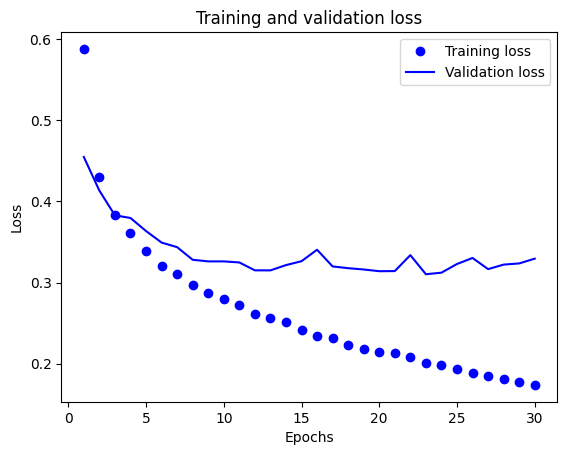

In [ ]:
epochs = range(1,  len(acc)+1)
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
history.history['val_loss']

[0.4547266960144043,
 0.4132700562477112,
 0.3827940821647644,
 0.37952449917793274,
 0.36346837878227234,
 0.34922337532043457,
 0.34356993436813354,
 0.32802650332450867,
 0.326020210981369,
 0.32602816820144653,
 0.32471534609794617,
 0.31500113010406494,
 0.3149303197860718,
 0.3214435577392578,
 0.3262397348880768,
 0.34039413928985596,
 0.3198186755180359,
 0.31765756011009216,
 0.3160475790500641,
 0.31393271684646606,
 0.31408533453941345,
 0.33371615409851074,
 0.31020429730415344,
 0.3121059238910675,
 0.3227955400943756,
 0.33024829626083374,
 0.3164809048175812,
 0.32206472754478455,
 0.32351094484329224,
 0.32940492033958435]

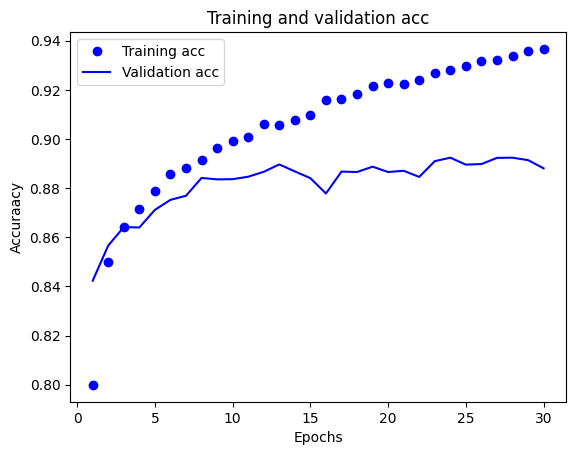

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuraacy')
plt.legend()

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=9, batch_size=128,
          validation_data=(val_scaled, val_target))

model.evaluate(test_input/255.0, test_target)

Epoch 1/9
375/375 [==============================] - 3s 6ms/step - loss: 0.5951 - accuracy: 0.7955 - val_loss: 0.4592 - val_accuracy: 0.8412
Epoch 2/9
375/375 [==============================] - 3s 7ms/step - loss: 0.4308 - accuracy: 0.8501 - val_loss: 0.4134 - val_accuracy: 0.8553
Epoch 3/9
375/375 [==============================] - 2s 5ms/step - loss: 0.3833 - accuracy: 0.8646 - val_loss: 0.3827 - val_accuracy: 0.8628
Epoch 4/9
375/375 [==============================] - 2s 5ms/step - loss: 0.3626 - accuracy: 0.8714 - val_loss: 0.3800 - val_accuracy: 0.8635
Epoch 5/9
375/375 [==============================] - 2s 5ms/step - loss: 0.3418 - accuracy: 0.8788 - val_loss: 0.3645 - val_accuracy: 0.8687
Epoch 6/9
375/375 [==============================] - 2s 5ms/step - loss: 0.3207 - accuracy: 0.8846 - val_loss: 0.3484 - val_accuracy: 0.8754
Epoch 7/9
375/375 [==============================] - 2s 5ms/step - loss: 0.3115 - accuracy: 0.8869 - val_loss: 0.3474 - val_accuracy: 0.8763
Epoch 8/9
375

[0.3599174916744232, 0.8730999827384949]

#드롭아웃

keras.layers.Dropout(0.3)

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
user_layer = keras.layers.Dropout(0.3)
def model_fn(user_layer=None):
    model = Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(Dense(100, activation='relu'))
    if user_layer:
        model.add(user_layer)
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn()

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 100)               78500     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = model_fn(user_layer=user_layer)

In [ ]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = model_fn()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, batch_size=128,
          validation_data=(val_scaled, val_target))

model.evaluate(test_input/255.0, test_target)

Epoch 1/20
375/375 [==============================] - 4s 6ms/step - loss: 0.5885 - accuracy: 0.8001 - val_loss: 0.4490 - val_accuracy: 0.8469
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4279 - accuracy: 0.8508 - val_loss: 0.4136 - val_accuracy: 0.8543
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.3819 - accuracy: 0.8656 - val_loss: 0.3943 - val_accuracy: 0.8601
Epoch 4/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3602 - accuracy: 0.8734 - val_loss: 0.3815 - val_accuracy: 0.8643
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3396 - accuracy: 0.8788 - val_loss: 0.3562 - val_accuracy: 0.8731
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3199 - accuracy: 0.8846 - val_loss: 0.3515 - val_accuracy: 0.8756
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3097 - accuracy: 0.8876 - val_loss: 0.3493 - val_accuracy: 0.8749
Epoch

[0.3405296504497528, 0.8838000297546387]

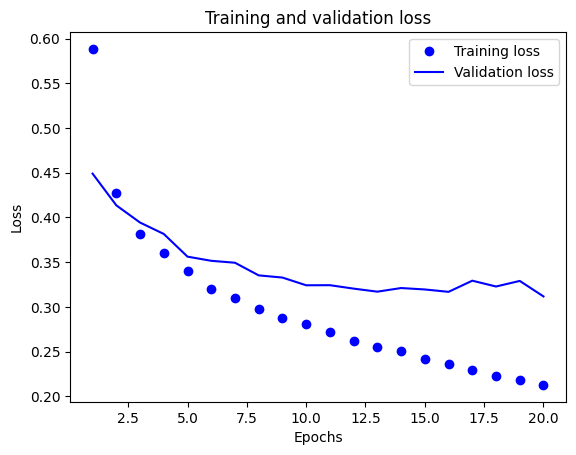

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,  len(acc)+1)
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

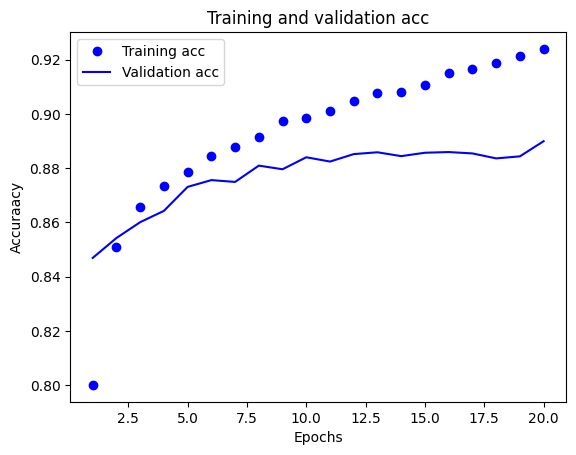

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuraacy')
plt.legend()

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, batch_size=128,
          validation_data=(val_scaled, val_target))

model.evaluate(test_input/255.0, test_target)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.6993 - accuracy: 0.7608 - val_loss: 0.4776 - val_accuracy: 0.8326
Epoch 2/20
375/375 [==============================] - 3s 9ms/step - loss: 0.4766 - accuracy: 0.8335 - val_loss: 0.4163 - val_accuracy: 0.8508
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4291 - accuracy: 0.8481 - val_loss: 0.4022 - val_accuracy: 0.8529
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.4032 - accuracy: 0.8577 - val_loss: 0.3725 - val_accuracy: 0.8667
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3863 - accuracy: 0.8614 - val_loss: 0.3643 - val_accuracy: 0.8683
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3698 - accuracy: 0.8662 - val_loss: 0.3451 - val_accuracy: 0.8760
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3558 - accuracy: 0.8716 - val_loss: 0.3463 - val_accuracy: 0.8714
Epoch 

[0.33611106872558594, 0.8812999725341797]

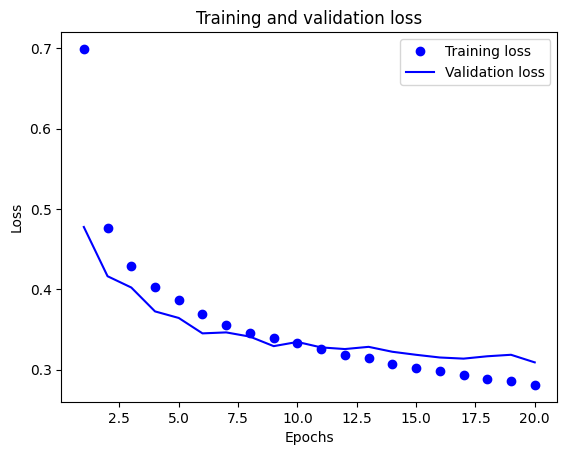

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,  len(acc)+1)
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

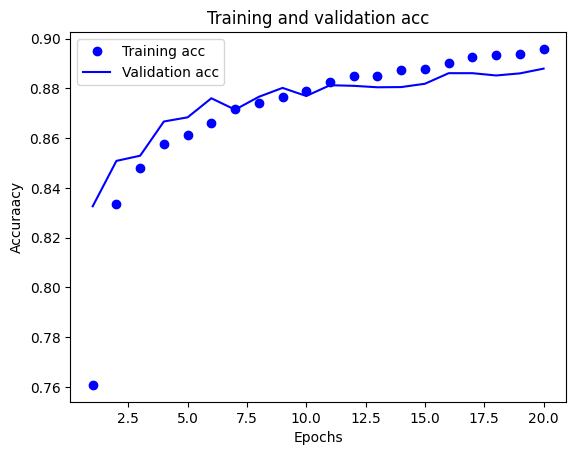

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuraacy')
plt.legend()

#모델 저장

In [ ]:
model.save('adam_dropout_fmnist.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
ls

adam_dropout_fmnist.h5  mm_ex.h5  model.png  sample_data/


In [ ]:
model3 = load_model('adam_dropout_fmnist.h5')

In [ ]:
val_labels = model3.predict(val_scaled)

375/375 [==============================] - 1s 3ms/step


In [ ]:
np.argmax(val_labels, axis=1)

array([8, 8, 7, ..., 8, 8, 6])

In [ ]:
val_idx = np.argmax(val_labels, axis=-1)

In [ ]:
np.mean(val_idx == val_target)

0.8879166666666667

In [ ]:
model.save_weights('weight_adam_dropout_fmnist.h5')

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

In [ ]:
ls

adam_dropout_fmnist.h5  mm_ex.h5  model.png  sample_data/  weight_adam_dropout_fmnist.h5


In [ ]:
model.load_weights('weight_adam_dropout_fmnist.h5')

In [ ]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)

375/375 [==============================] - 2s 5ms/step


In [ ]:
np.mean(val_labels == val_target)

0.8879166666666667

#콜백 : ModelCheckpoint, EarlyStopping

ModelCheckpoint

    - 에포크마다 모델 저장

    - save_best_only = True : 가장 낮은 검증 점수를 만드는 모델을 저장


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only = True)

model.fit(train_scaled, train_target, epochs=20,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5865 - accuracy: 0.7943 - val_loss: 0.4225 - val_accuracy: 0.8457
Epoch 2/20
  44/1500 [..............................] - ETA: 5s - loss: 0.4736 - accuracy: 0.8274

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 6s 4ms/step - loss: 0.4382 - accuracy: 0.8421 - val_loss: 0.3849 - val_accuracy: 0.8601
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4048 - accuracy: 0.8544 - val_loss: 0.3725 - val_accuracy: 0.8648
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3830 - accuracy: 0.8601 - val_loss: 0.3586 - val_accuracy: 0.8683
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3662 - accuracy: 0.8655 - val_loss: 0.3466 - val_accuracy: 0.8743
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3547 - accuracy: 0.8695 - val_loss: 0.3407 - val_accuracy: 0.8777
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3477 - accuracy: 0.8710 - val_loss: 0.3326 - val_accuracy: 0.8772
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3396 - accuracy: 0.8753 - val_loss: 0.3354 - val_accuracy: 0.8778
Epo

In [ ]:
ls

adam_dropout_fmnist.h5  mm_ex.h5   sample_data/
best-model.h5           model.png  weight_adam_dropout_fmnist.h5


In [ ]:
ls -al

total 2320
drwxr-xr-x 1 root root   4096 Nov  9 07:10 ./
drwxr-xr-x 1 root root   4096 Nov  9 00:01 ../
-rw-r--r-- 1 root root 981176 Nov  9 06:39 adam_dropout_fmnist.h5
-rw-r--r-- 1 root root 981176 Nov  9 07:12 best-model.h5
drwxr-xr-x 4 root root   4096 Nov  7 14:25 .config/
-rw-r--r-- 1 root root  47584 Nov  9 01:29 mm_ex.h5
-rw-r--r-- 1 root root   6622 Nov  9 00:07 model.png
drwxr-xr-x 1 root root   4096 Nov  7 14:26 sample_data/
-rw-r--r-- 1 root root 333320 Nov  9 06:47 weight_adam_dropout_fmnist.h5


In [ ]:
model_best = load_model('best-model.h5')

model_best.evaluate(test_input/255.0, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.3540 - accuracy: 0.8784


[0.3540452718734741, 0.8784000277519226]

In [ ]:
model_best.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 6ms/step - loss: 0.3166 - accuracy: 0.8842


[0.31655970215797424, 0.8842499852180481]

EarlyStopping

    - 조기 종료 해주는 콜백 (loss 값이 감소하지 않으면)

    - patience = 3 : 연속 3번까지 검증 손실 점수가 향상되지 않으면 중지

    - restore_best_weights = True 가장 낮은 검증 손실을 낸 모델 파라미터로 재학습 시켜 놓는다.

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only = True)
earlystopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                 restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5965 - accuracy: 0.7905 - val_loss: 0.4271 - val_accuracy: 0.8464
Epoch 2/20
  52/1500 [>.............................] - ETA: 4s - loss: 0.4656 - accuracy: 0.8323

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 8s 5ms/step - loss: 0.4387 - accuracy: 0.8431 - val_loss: 0.3832 - val_accuracy: 0.8616
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4036 - accuracy: 0.8544 - val_loss: 0.3687 - val_accuracy: 0.8668
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3835 - accuracy: 0.8605 - val_loss: 0.3484 - val_accuracy: 0.8727
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3683 - accuracy: 0.8639 - val_loss: 0.3447 - val_accuracy: 0.8724
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3520 - accuracy: 0.8712 - val_loss: 0.3388 - val_accuracy: 0.8774
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3440 - accuracy: 0.8746 - val_loss: 0.3266 - val_accuracy: 0.8798
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3349 - accuracy: 0.8745 - val_loss: 0.3256 - val_accuracy: 0.8831
Epo

In [ ]:
earlystopping_cb.stopped_epoch

10

두 콜백을 사용한 결과

    - 검증 손실값이 향상 되지 않을때, 훈련 중지

    - 가장 낮은 검증 손실값의 모델을 저장

    - 최상의 파라미터로 매개변수 복구

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8831


[0.3255554139614105, 0.8830833435058594]

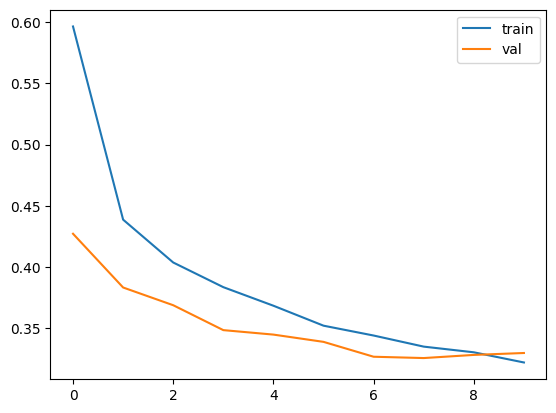

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])

In [ ]:
ls ./drive/MyDrive/data/*.py

./drive/MyDrive/data/AnnUser.py  ./drive/MyDrive/data/multi_layer_net_extend.py
./drive/MyDrive/data/mln.py      ./drive/MyDrive/data/n_his_plot.py
./drive/MyDrive/data/mnist.py


In [ ]:
import drive.MyDrive.data.n_his_plot as hp

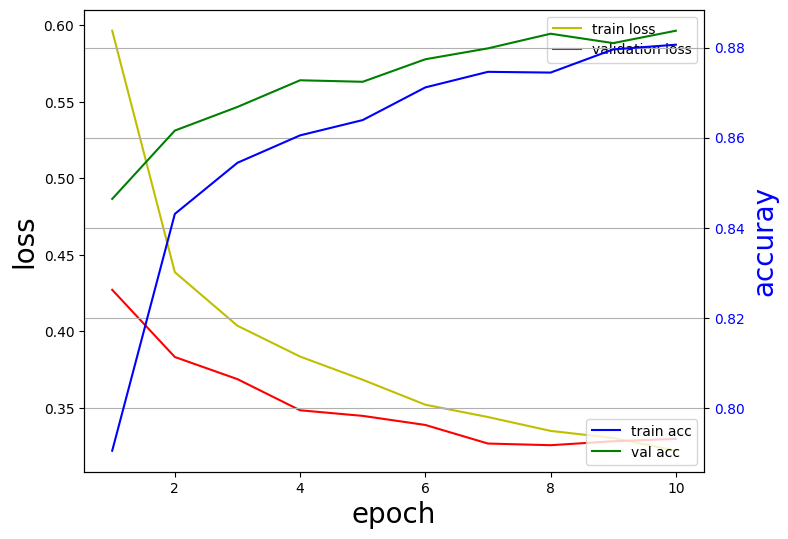

In [ ]:
hp.history_plot(history)

In [ ]:
cat ./drive/MyDrive/data/n_his_plot.py

#!/usr/bin/env python
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np

def set_val_train(hist_dict):
    on_off1 = hist_dict.get('val_loss')
    on_off2 = hist_dict.get('accuracy')
    if on_off1:
        if on_off2:
            train_loss = hist_dict['loss']
            train_acc  = hist_dict['accuracy']
            val_loss = hist_dict['val_loss']
            val_acc  = hist_dict['val_accuracy']
        else:
            train_loss = hist_dict['loss']
            train_acc  = hist_dict['acc']
            val_loss = hist_dict['val_loss']
            val_acc  = hist_dict['val_acc']
    else:
        if on_off2:
    	    train_loss = hist_dict['loss']
    	    train_acc  = hist_dict['accuracy']
        else:
    	    train_loss = hist_dict['loss']
    	    train_acc  = hist_dict['acc']
        shapes = len(train_acc)
        nan_array = np.empty((shapes,))
        nan_array.fill(np.nan)
        val_loss = nan_array
        val_acc = nan_array 
    return train